# AAA 2024/2025 - Project 2
## Group 8: António Estêvão (58203), Diogo Venes (58216)

We begin with a few lines that were necessary to run the notebook in Google Colab, and can be ignored/skipped if executing the notebook locally.

In [ ]:
!pip install jax
!pip install optax
!pip install gymnax
!pip install flax
!pip install chex
!pip install distrax

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 36.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 45.9 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827626 sha256=c0273634e5953d24d1329271fee9b524b38d6e0046ef04ea4b53e8713f8b0e12
  Stored in directory: /root/.cache/pip/wheels/b9/22/6d/3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.0 requires gy

In [ ]:
import zipfile
import sys

with zipfile.ZipFile("RLinJAX.zip", "r") as zip_ref:
    zip_ref.extractall(".")  # Extract to the current directory

# Step 3: Add to Python path
sys.path.append("./RLinJAX")

# Step 4: Test import
from RLinJAX import *
print("RLinJAX imported successfully!")

RLinJAX imported successfully!


## 1. Training the Q-Learning Agent

First, we define a function that takes a state and discretizes it so that it can be used as an index in the Q-table. This is necessary because, unlike other problems, the state space in the MountainCar environment is continuous.

In [ ]:
def discretize_state(state):
    position, velocity = state
    position_div = int((position - env.observation_space.low[0]) / (env.observation_space.high[0] - env.observation_space.low[0]) * (positions - 1))
    velocity_div = int((velocity - env.observation_space.low[1]) / (env.observation_space.high[1] - env.observation_space.low[1]) * (velocities - 1))
    return position_div, velocity_div

Next, we define the epsilon-greedy policy, which selects a random action with probability epsilon and the action with the highest Q-value otherwise.

In [ ]:
import random

def epsilon_greedy(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q_table[state])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from tqdm import tqdm

Episode 100: Avg Reward = -200.00, Epsilon = 0.905
Episode 200: Avg Reward = -200.00, Epsilon = 0.819
Episode 300: Avg Reward = -200.00, Epsilon = 0.741
Episode 400: Avg Reward = -200.00, Epsilon = 0.670
Episode 500: Avg Reward = -200.00, Epsilon = 0.606
Episode 600: Avg Reward = -200.00, Epsilon = 0.549
Episode 700: Avg Reward = -200.00, Epsilon = 0.496
Episode 800: Avg Reward = -200.00, Epsilon = 0.449
Episode 900: Avg Reward = -200.00, Epsilon = 0.406
Episode 1000: Avg Reward = -200.00, Epsilon = 0.368
Episode 1100: Avg Reward = -200.00, Epsilon = 0.333
Episode 1200: Avg Reward = -199.76, Epsilon = 0.301
Episode 1300: Avg Reward = -199.41, Epsilon = 0.272
Episode 1400: Avg Reward = -199.47, Epsilon = 0.246
Episode 1500: Avg Reward = -199.73, Epsilon = 0.223
Episode 1600: Avg Reward = -199.75, Epsilon = 0.202
Episode 1700: Avg Reward = -198.63, Epsilon = 0.183
Episode 1800: Avg Reward = -197.84, Epsilon = 0.165
Episode 1900: Avg Reward = -197.92, Epsilon = 0.149
Episode 2000: Avg Rew

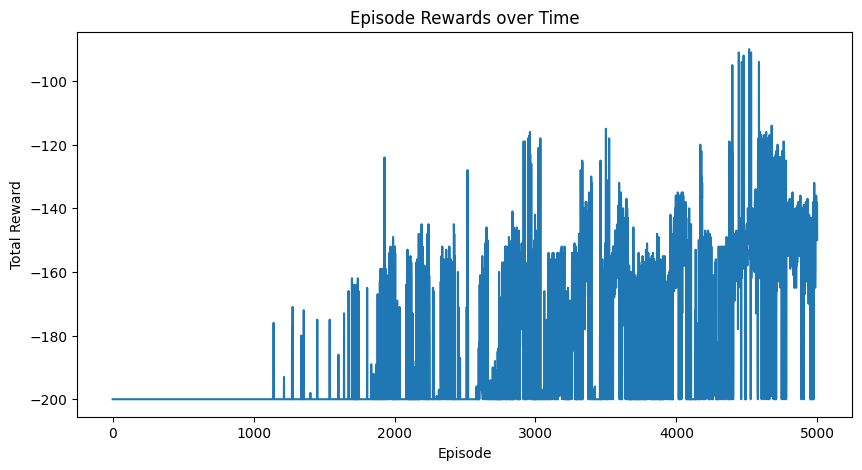

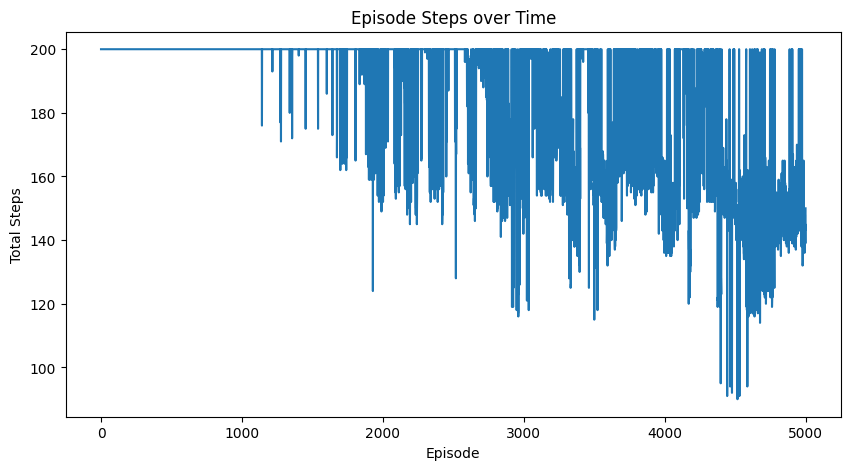

In [ ]:
env = gym.make('MountainCar-v0')

episodes = 5000
steps = 200
positions = 20
velocities = 20
n_actions = env.action_space.n

alpha = 0.1
gamma = 0.99
epsilon = 1
epsilon_min = 0.01
epsilon_decay = 0.999

Q_table = np.zeros((positions, velocities, n_actions))

episode_rewards = []
episode_steps = []

for episode in range(episodes):
    state, _ = env.reset()
    total_reward = 0
    nsteps = 0

    for step in range(steps):
        nsteps += 1
        pos, vel = discretize_state(state)

        action = epsilon_greedy((pos, vel), epsilon)

        next_state, reward, done, _, _ = env.step(action)
        total_reward += reward

        next_pos, next_vel = discretize_state(next_state)

        Q_table[pos, vel, action] = Q_table[pos, vel, action] + alpha * (reward + gamma * np.max(Q_table[next_pos, next_vel]) - Q_table[pos, vel, action])

        state = next_state

        if done:
            break

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    episode_steps.append(nsteps)
    # Store episode statistics
    episode_rewards.append(total_reward)

    # Print progress every 100 episodes
    if (episode + 1) % 100 == 0:
        avg_reward = np.mean(episode_rewards[-100:])
        print(f"Episode {episode + 1}: Avg Reward = {avg_reward:.2f}, "
              f"Epsilon = {epsilon:.3f}")

plt.figure(figsize=(10, 5))
plt.plot(episode_rewards)
plt.title('Episode Rewards over Time')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(episode_steps)
plt.title('Episode Steps over Time')
plt.xlabel('Episode')
plt.ylabel('Total Steps')
plt.show()

env.close()

Analyzing the graphs above, we see that theres a correlation between both of them. This is due to the fact that the rewards on the mountain car problem are negative and directly correlated to the number of steps taken to reach the goal. In terms of the values observed, we see a somewhat clearly defined upwards curve. We implemented an epsilon decay where the epsilon is at its minimum of 0.010 at the end of the execution.
In terms of the results, the agent performs decently well, taking around 120 steps to solve the problem due to the reward of around -120 being seen in the graph. However, if we analyse the graph only until the 2500th episode, i.e. around 500,000 total timesteps as we will have in the next two agents, we observe a worse reward, around -150.

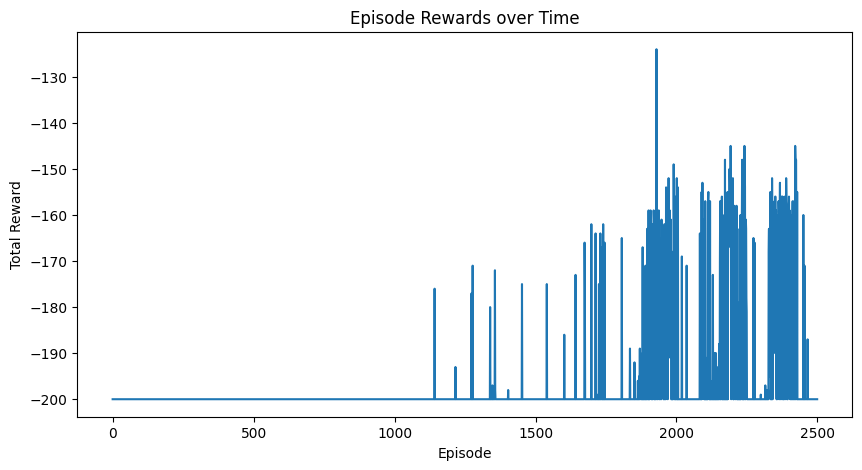

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(episode_rewards[:2500])
plt.title('Episode Rewards over Time')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

## 2. Training the DQN Agent

In [ ]:
import time
from RLinJAX import *
import jax

CONFIGS = {"dqn":{"agent": "DuelingQNetwork",
                  "agent_kwargs": {"activation": "swish"},
                  #"num_envs": 10,
                  "buffer_size": 100_000,
                  "fill_buffer": 1_000,
                  "batch_size": 100,
                  "learning_rate": 0.0001,
                  "polyak": 0.93,
                  "num_epochs": 5,
                  "target_update_freq": 500,
                  "total_timesteps": 500_000,
                  "eval_freq": 5000,
                  "eps_start": 1,
                  "eps_end": 0.01,
                  "exploration_fraction": 0.5,
                  "gamma": 0.99,
                  "ddqn": True
                 }
          }

Now, we define the config for the DQN agent, as exemplified in the cartpole example provided.
In comparison to the Q-learning agent previously, here we can only control the total number of timesteps, which we have settled on 500,000. We chose this number as it seemed a good balance between giving the agents time to learn the environment and keeping the execution time to around 10 minutes, a reasonable time. The number of steps per episode is something we can't control.

In [ ]:
algo_str = "dqn"
env_str = "MountainCar-v0"

algo_cls = get_algo(algo_str)
algo = algo_cls.create(env=env_str, **CONFIGS.get(algo_str, {}))

In [ ]:
# set training seed and jit train function
rng = jax.random.PRNGKey(0)
train_fn = jax.jit(algo.train)

print("Starting to train")
# Train
start = time.time()
train_state, evaluation = train_fn(rng)
time_elapsed = time.time() - start

sps = algo.total_timesteps / time_elapsed
print(f"Finished training in {time_elapsed:g} seconds ({sps:g} steps/second).")

Starting to train


/usr/local/lib/python3.10/dist-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)
/usr/local/lib/python3.10/dist-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


Finished training in 381.824 seconds (1309.5 steps/second).


In [ ]:
print('Tuple size:', len(evaluation))
print('Episodic lengths and episodic returns shape:', evaluation[0].shape)
print(f"{algo.total_timesteps} / {algo.eval_freq} + 1 = {(algo.total_timesteps/algo.eval_freq+1)}" )

Tuple size: 2
Episodic lengths and episodic returns shape: (101, 128)
500000 / 5000 + 1 = 101.0


In [ ]:
evaluation

(Array([[200, 200, 200, ..., 200, 200, 200],
        [200, 200, 200, ..., 200, 200, 200],
        [200, 200, 200, ..., 200, 200, 200],
        ...,
        [120, 104,  87, ..., 104, 102,  89],
        [105, 130, 107, ...,  96,  84,  99],
        [115,  85, 117, ..., 123, 123,  87]], dtype=int32, weak_type=True),
 Array([[-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        ...,
        [-120., -104.,  -87., ..., -104., -102.,  -89.],
        [-105., -130., -107., ...,  -96.,  -84.,  -99.],
        [-115.,  -85., -117., ..., -123., -123.,  -87.]],      dtype=float32, weak_type=True))

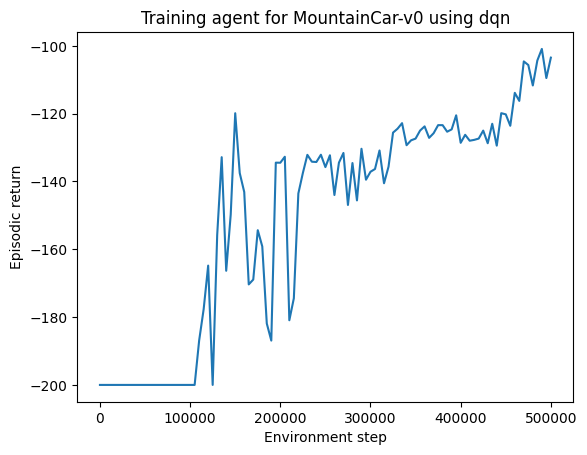

In [ ]:
from matplotlib import pyplot as plt

episode_lengths, episode_returns = evaluation
mean_return = episode_returns.mean(axis=1)

plt.plot(jax.numpy.linspace(0, algo.total_timesteps, len(mean_return)), mean_return)
plt.xlabel("Environment step")
plt.ylabel("Episodic return")
plt.title(f"Training agent for {env_str} using {algo_str}")
plt.show()

## 3. Training the SAC agent

In [ ]:
import jax
from RLinJAX import *
import time

CONFIGS2 = {
    "sac": {
        "agent_kwargs": {"activation": "tanh"},
        "buffer_size": 100_000,
        "fill_buffer": 1_000,
        "batch_size": 100,
        "learning_rate": 0.0001,
        "gamma": 0.99,
        "polyak": 0.5,
        "num_epochs": 5,
        "target_update_freq": 500,
        "total_timesteps": 500_000,
        "eval_freq": 5000,
        "target_entropy_ratio": 0.2,
        "num_critics": 2
    }
}

Moving on to the SAC agent, we see that our config takes on some new parameters and some others aren't used, when compared to the DQN agent. This is due to the fact that this agent won't use the epsilon-greedy specific parameters (eps_start, eps_end, exploration_fraction), instead we need to set the num_critics and the target_entropy_ratio, for example.
After testing with various configs, mainly changing the polyak parameter, we found that a value of around 0.93-0.96 produced a peak of -120. When we lowered the polyak value to around 0.5, we got -100. We also found that the activation function had to be changed from the default "relu" to "tanh", as with the default we were not getting any significant results.

In [ ]:
algo_str2 = "sac"
env_str2 = "MountainCar-v0"

algo_cls2 = get_algo(algo_str2)
algo2 = algo_cls2.create(env=env_str2, **CONFIGS2.get(algo_str2, {}))

In [ ]:
# set training seed and jit train function
rng2 = jax.random.PRNGKey(0)
train_fn = jax.jit(algo2.train)

print("Starting to train SAC agent")
# Train
start = time.time()
train_state2, evaluation2 = train_fn(rng2)
time_elapsed = time.time() - start

sps = algo2.total_timesteps / time_elapsed
print(f"Finished training in {time_elapsed:g} seconds ({sps:g} steps/second).")

Starting to train SAC agent


/usr/local/lib/python3.10/dist-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


Finished training in 604.623 seconds (826.962 steps/second).


In [ ]:
print('Tuple size:', len(evaluation2))
print('Episodic lengths and episodic returns shape:', evaluation2[0].shape)
print(f"{algo2.total_timesteps} / {algo2.eval_freq} + 1 = {(algo2.total_timesteps/algo2.eval_freq+1)}" )

Tuple size: 2
Episodic lengths and episodic returns shape: (101, 128)
500000 / 5000 + 1 = 101.0


In [ ]:
evaluation2

(Array([[200, 200, 200, ..., 200, 200, 200],
        [200, 200, 200, ..., 200, 200, 200],
        [200, 200, 200, ..., 200, 200, 200],
        ...,
        [ 84, 106,  93, ..., 106,  87, 109],
        [106,  91, 106, ...,  86, 106,  86],
        [105, 107, 107, ...,  84, 105, 109]], dtype=int32, weak_type=True),
 Array([[-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        ...,
        [ -84., -106.,  -93., ..., -106.,  -87., -109.],
        [-106.,  -91., -106., ...,  -86., -106.,  -86.],
        [-105., -107., -107., ...,  -84., -105., -109.]],      dtype=float32, weak_type=True))

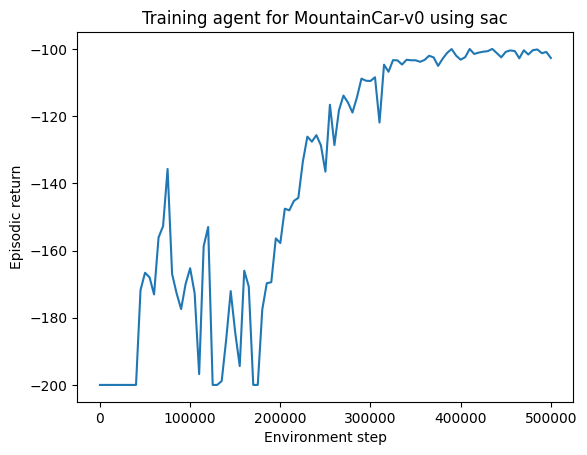

In [ ]:
# Analyze evaluation results
episode_lengths2, episode_returns2 = evaluation2
mean_return2 = episode_returns2.mean(axis=1)

plt.plot(jax.numpy.linspace(0, algo2.total_timesteps, len(mean_return2)), mean_return2)
plt.xlabel("Environment step")
plt.ylabel("Episodic return")
plt.title(f"Training agent for {env_str2} using {algo_str2}")
plt.show()

We see a peak of -100 that seems to have stabilized from about the 400,000th step until the end of our execution.

Now, let's test the effect of the target_entropy_ratio parameter by gradually increasing it from the 0.2 we had at the start.

In [ ]:
algo2 = algo2.replace(target_entropy_ratio=0.5)
print(f"New ratio: {algo2.target_entropy_ratio}")

New ratio: 0.5


In [ ]:
# set training seed and jit train function
rng2 = jax.random.PRNGKey(0)
train_fn = jax.jit(algo2.train)

print("Starting to train SAC agent")
# Train
start = time.time()
train_state2, evaluation2 = train_fn(rng2)
time_elapsed = time.time() - start

sps = algo2.total_timesteps / time_elapsed
print(f"Finished training in {time_elapsed:g} seconds ({sps:g} steps/second).")

Starting to train SAC agent


/usr/local/lib/python3.10/dist-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


Finished training in 605.229 seconds (826.134 steps/second).


In [ ]:
evaluation2

(Array([[200, 200, 200, ..., 200, 200, 200],
        [200, 200, 200, ..., 200, 200, 200],
        [200, 200, 200, ..., 200, 200, 200],
        ...,
        [ 90, 119, 117, ..., 118,  99, 118],
        [117, 114, 118, ...,  95, 122,  93],
        [116, 125, 118, ...,  89, 116, 119]], dtype=int32, weak_type=True),
 Array([[-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        ...,
        [ -90., -119., -117., ..., -118.,  -99., -118.],
        [-117., -114., -118., ...,  -95., -122.,  -93.],
        [-116., -125., -118., ...,  -89., -116., -119.]],      dtype=float32, weak_type=True))

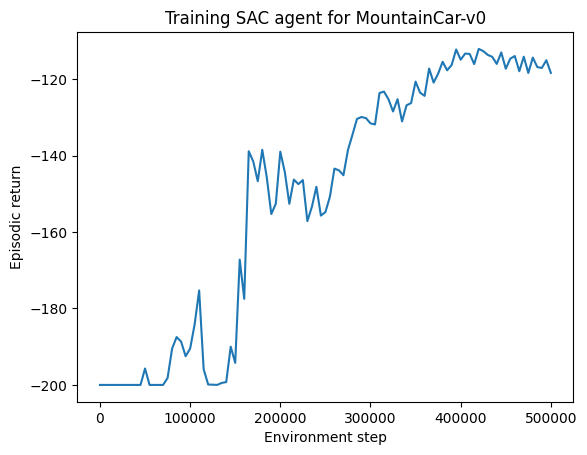

In [ ]:
# Analyze evaluation results
episode_lengths2, episode_returns2 = evaluation2
mean_return2 = episode_returns2.mean(axis=1)

plt.plot(jax.numpy.linspace(0, algo2.total_timesteps, len(mean_return2)), mean_return2)
plt.xlabel("Environment step")
plt.ylabel("Episodic return")
plt.title(f"Training SAC agent for {env_str2}")
plt.show()

As we can see, the results seem to have gotten worse, as our curve, despite ramping up at around the same step, peaks at -120 instead of the previous -100.

Lets try increasing this value one more time and seeing what happens.

In [ ]:
algo2 = algo2.replace(target_entropy_ratio=0.8)
print(f"New ratio: {algo2.target_entropy_ratio}")

New ratio: 0.8


In [ ]:
# set training seed and jit train function
rng2 = jax.random.PRNGKey(0)
train_fn = jax.jit(algo2.train)

print("Starting to train SAC agent")
# Train
start = time.time()
train_state2, evaluation2 = train_fn(rng2)
time_elapsed = time.time() - start

sps = algo2.total_timesteps / time_elapsed
print(f"Finished training in {time_elapsed:g} seconds ({sps:g} steps/second).")

Starting to train SAC agent


/usr/local/lib/python3.10/dist-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


Finished training in 606.043 seconds (825.023 steps/second).


In [ ]:
evaluation2

(Array([[200, 200, 200, ..., 200, 200, 200],
        [200, 200, 200, ..., 200, 200, 200],
        [200, 200, 200, ..., 200, 200, 200],
        ...,
        [164, 186, 157, ..., 199, 172, 144],
        [196, 169, 200, ..., 165, 168, 160],
        [177, 200, 154, ..., 165, 152, 200]], dtype=int32, weak_type=True),
 Array([[-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        ...,
        [-164., -186., -157., ..., -199., -172., -144.],
        [-196., -169., -200., ..., -165., -168., -160.],
        [-177., -200., -154., ..., -165., -152., -200.]],      dtype=float32, weak_type=True))

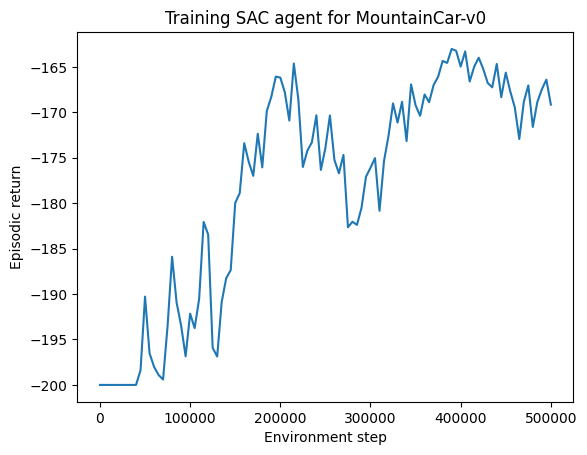

In [ ]:
# Analyze evaluation results
episode_lengths2, episode_returns2 = evaluation2
mean_return2 = episode_returns2.mean(axis=1)

plt.plot(jax.numpy.linspace(0, algo2.total_timesteps, len(mean_return2)), mean_return2)
plt.xlabel("Environment step")
plt.ylabel("Episodic return")
plt.title(f"Training SAC agent for {env_str2}")
plt.show()

Once again, the results got worse as we see a peak of -165 towards the end of the execution.

## 4. Comparing the agents

Looking back at the graphs for the three agents, we see that we got the best performance with the best found configs out of the DQN and SAC agents, which reached a reward of -100. However, while the SAC agent's graph seems to have stabilized, the DQN agent looks like it could keep improving if given more timesteps.
Finally, the Q-learning agent, when considering the same amount of total timesteps as the other two, was the worst one with a reward of around -150.